In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

np.random.seed(35)

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, '3')

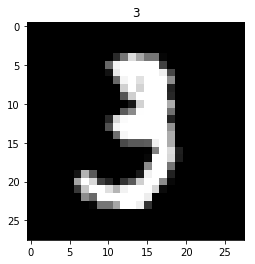

In [3]:
plt.imshow(X_train[10], cmap='gray')
plt.title(y_train[10])

In [4]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

In [5]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [6]:

model = Sequential()

model.add(Dense(30, input_dim=784))

model.add(Activation('sigmoid'))

model.add(Dense(10))

model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])



In [8]:

size = int(len(X_train) * 0.1)

train_x, val_x = X_train[:size], X_train[size:]
train_y, val_y = Y_train[:size], Y_train[size:]

In [9]:
model.fit(train_x, train_y, batch_size=10, nb_epoch=10, validation_data=(val_x, val_y))



Instructions for updating:
Use tf.cast instead.


/Users/martinvagenknecht/Keras-MNIST/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 6000 samples, validate on 54000 samples
Epoch 1/10
6000/6000 [==============================] - 3s 504us/step - loss: 2.0510 - acc: 0.4473 - val_loss: 1.8260 - val_acc: 0.5974
Epoch 2/10
6000/6000 [==============================] - 3s 467us/step - loss: 1.6095 - acc: 0.6990 - val_loss: 1.4531 - val_acc: 0.7137
Epoch 3/10
6000/6000 [==============================] - 3s 435us/step - loss: 1.2749 - acc: 0.7687 - val_loss: 1.1765 - val_acc: 0.7714
Epoch 4/10
6000/6000 [==============================] - 3s 470us/step - loss: 1.0396 - acc: 0.8045 - val_loss: 0.9865 - val_acc: 0.8015
Epoch 5/10
6000/6000 [==============================] - 3s 447us/step - loss: 0.8799 - acc: 0.8300 - val_loss: 0.8571 - val_acc: 0.8236
Epoch 6/10
6000/6000 [==============================] - 3s 576us/step - loss: 0.7683 - acc: 0.8492 - val_loss: 0.7651 - val_acc: 0.8383
Epoch 7/10
6000/6000 [==============================] - 3s 578us/step - loss: 0.6866 - acc: 0.8637 - val_loss: 0.6964 - val_acc: 0.8472

In [10]:

score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 0s 16us/step

Test accuracy:  0.8709


In [11]:

predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output.csv', index=False)
